In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:/Users/SRISTI/Desktop/practice text doc/census_income.csv",na_values=' ?')
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## EDA

In [3]:
ds=data.copy()

In [4]:
ds.shape

(32560, 15)

Dataset has 32560 rows and 15 columns.

In [5]:
ds.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Dataset has 9 object type column and 6 int type column.

In [7]:
ds.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Previous dataset has not contain any null value but after replacing '?' to nan, there are lots of nan values.

In [8]:
ds.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [9]:
ds.Education.nunique()

16

In [10]:
ds.Education_num.nunique()

16

Education_num is just a count number for Education column so we can drop this column we don't need it.

In [11]:
ds.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
ds.Workclass.nunique()

8

In [13]:
ds.Marital_status.nunique()

7

In [14]:
ds.Occupation.nunique()

14

In [15]:
ds.Relationship.nunique()

6

In [16]:
ds.Race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [17]:
ds.Race.nunique()

5

In [18]:
ds.Native_country.nunique()

41

In [19]:
ds.Native_country.value_counts()

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

Here United_state is in large number,and we have some good number of null value in it if we fill that with the mode,United_state will be definitely problematic, prediction will be biased to the one country, so we should drop this column.

In [20]:
ds.Sex.unique()

array([' Male', ' Female'], dtype=object)

In [21]:
ds1=ds.drop(['Education_num','Native_country'],axis=1)

In [22]:
ds1.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K


## Visualizations

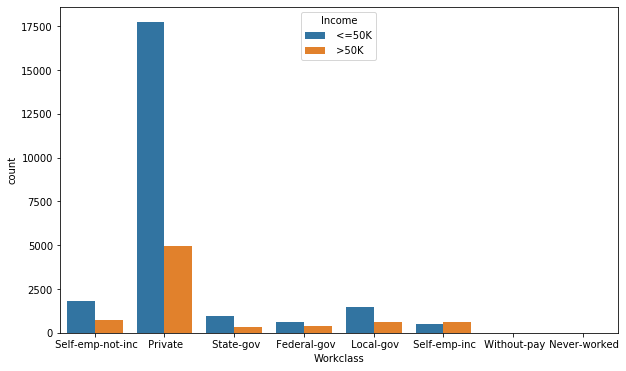

In [23]:
plt.figure(figsize=(10,6))
sns.countplot('Workclass',data=ds1,hue='Income')
plt.show()

Most of the people are from private workclass who have >50k and <=50k as income.

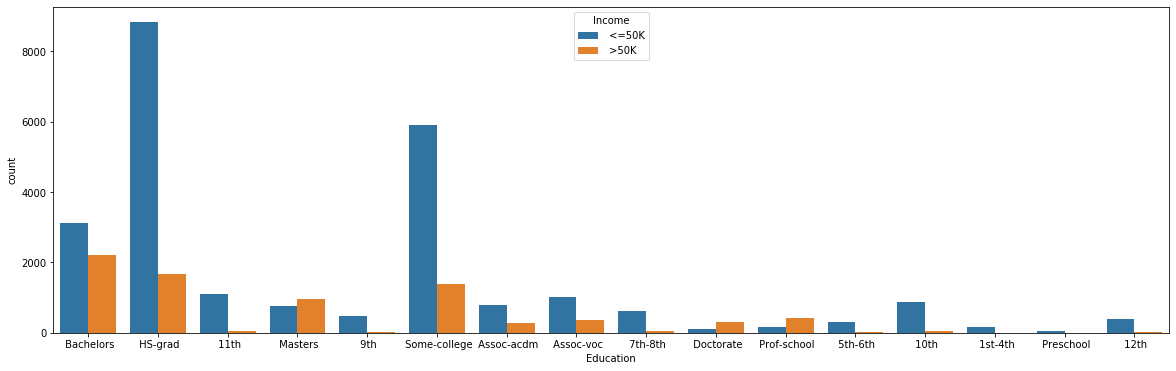

In [24]:
plt.figure(figsize=(20,6))
sns.countplot('Education',data=ds1,hue='Income')
plt.show()

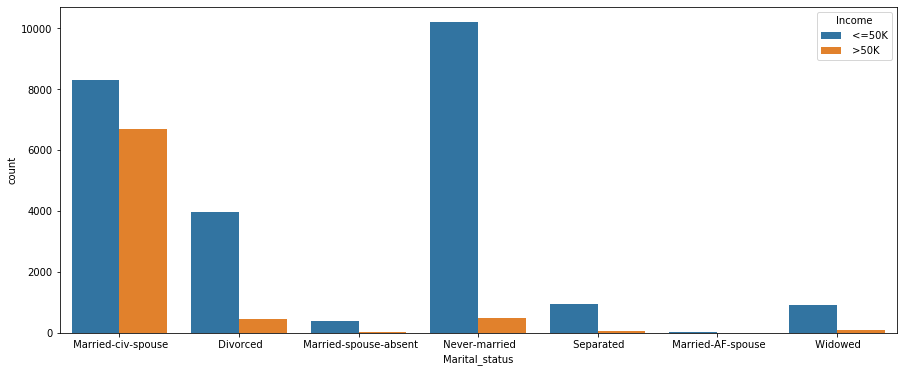

In [25]:
plt.figure(figsize=(15,6))
sns.countplot('Marital_status',data=ds1,hue='Income')
plt.show()

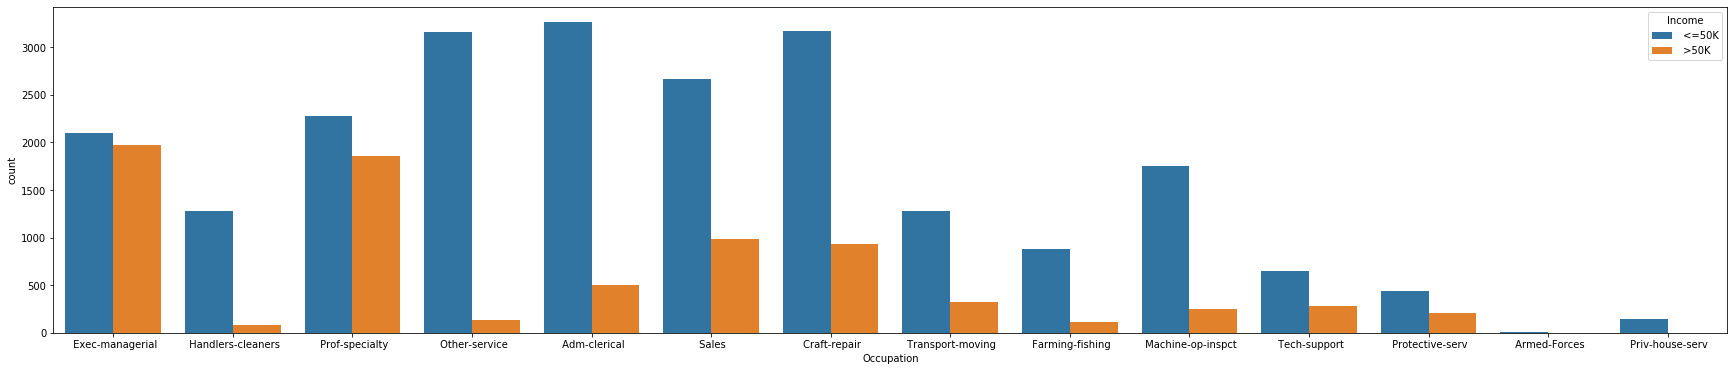

In [26]:
plt.figure(figsize=(30,6))
sns.countplot('Occupation',data=ds1,hue='Income')
plt.show()

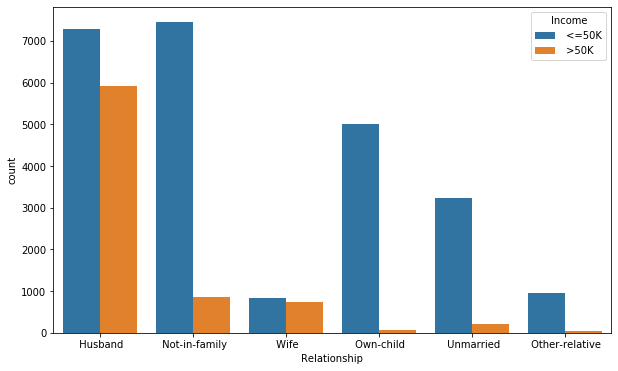

In [27]:
plt.figure(figsize=(10,6))
sns.countplot('Relationship',data=ds1,hue='Income')
plt.show()

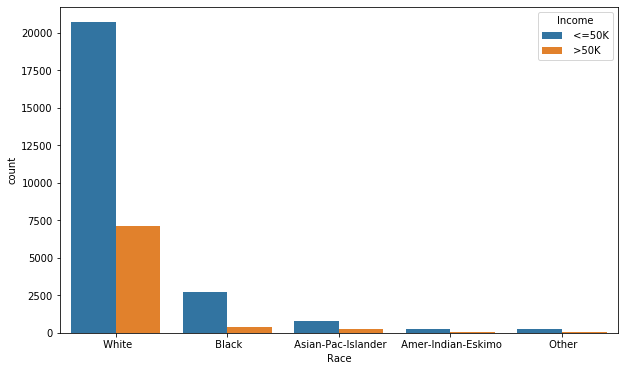

In [28]:
plt.figure(figsize=(10,6))
sns.countplot('Race',data=ds1,hue='Income')
plt.show()

White category of Race has highest count for earning <=50k and >50K than other categories.

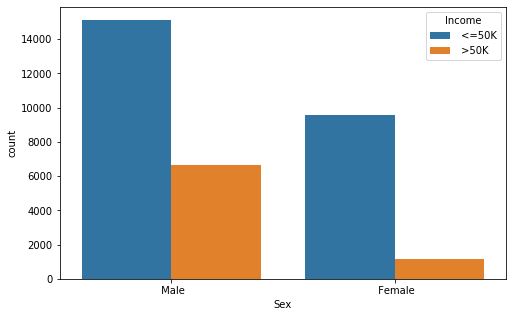

In [29]:
plt.figure(figsize=(8,5))
sns.countplot('Sex',data=ds1,hue='Income')
plt.show()

Males are high in number, earning >50k and<=50k as compare to female. but females are very less at income >50k.

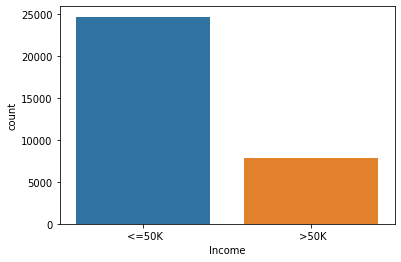

In [30]:
sns.countplot(ds1['Income'])

target variable is little imbalance, first we proceed as it is, if there is any need to balance we do it then.

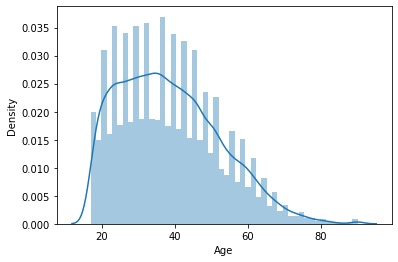

In [31]:
sns.distplot(ds1['Age'])

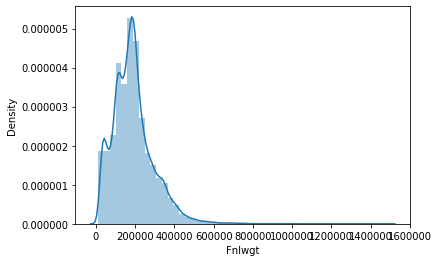

In [32]:
sns.distplot(ds1['Fnlwgt'])

This column is righly skewed.

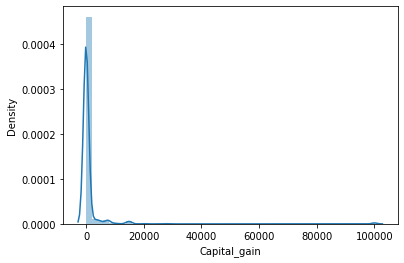

In [33]:
sns.distplot(ds1['Capital_gain'])

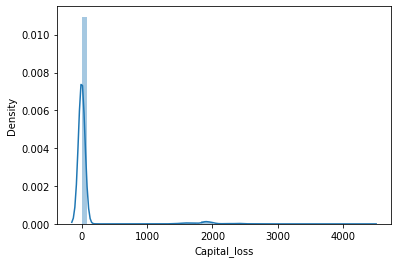

In [34]:
sns.distplot(ds1['Capital_loss'])

capital gain and capital loss both the columns are maximum at zero,means maximun values of these columns are zero.

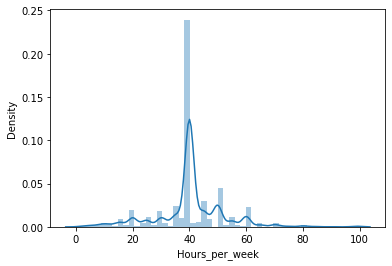

In [35]:
sns.distplot(ds1['Hours_per_week'])

maximum hours per week is almost 40 hours.

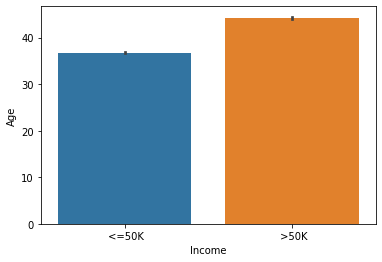

In [36]:
sns.barplot(x='Income',y='Age',data=ds1)

Higher the age higher the income.

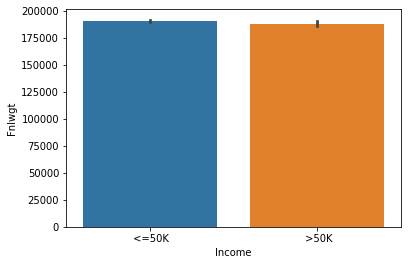

In [37]:
sns.barplot(x='Income',y='Fnlwgt',data=ds1)

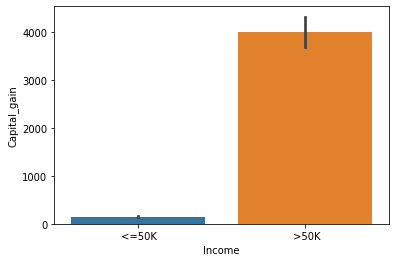

In [38]:
sns.barplot(x='Income',y='Capital_gain',data=ds1)

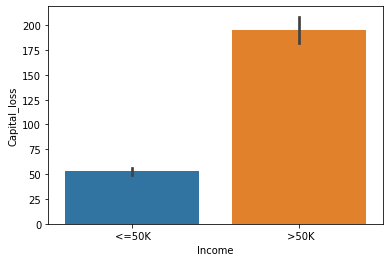

In [39]:
sns.barplot(x='Income',y='Capital_loss',data=ds1)

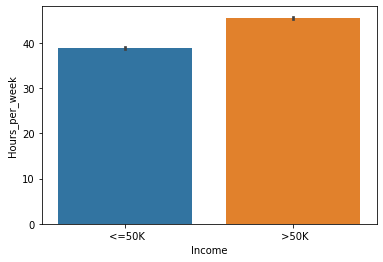

In [40]:
sns.barplot(x='Income',y='Hours_per_week',data=ds1)

More the working hour more the income.

In [41]:
ds1.describe()

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


capital loss and capital gain have min,25%,median,75% values as zero.
std is much higher than the mean in these columns.
after seeing the max values, we can say that there are only outliers are present.
we can drop these two columns.

In [42]:
ds2=ds1.drop(['Capital_gain','Capital_loss'],axis=1)

We try to remove outliers but huge number of data will be lost so, we should not do that. but separately I tried with removal of outliers but there is only small change in accuracy.

### Encoding

In [43]:
ds2.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K


In [44]:
from sklearn.preprocessing import OrdinalEncoder

In [45]:
oe=OrdinalEncoder()

In [46]:
ds2['Relationship']=oe.fit_transform(ds2['Relationship'].values.reshape(-1,1))
ds2['Race']=oe.fit_transform(ds2['Race'].values.reshape(-1,1))
ds2['Sex']=oe.fit_transform(ds2['Sex'].values.reshape(-1,1))
ds2['Income']=oe.fit_transform(ds2['Income'].values.reshape(-1,1))

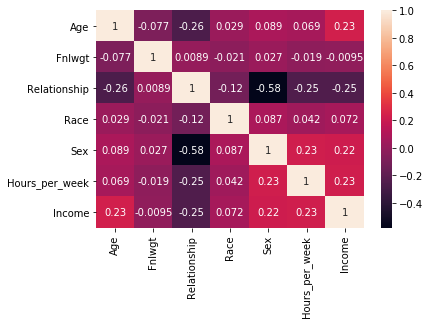

In [47]:
sns.heatmap(ds2.corr(),annot=True)

Age,Sex and Hours_per_week quite ok correlated to target variable.
Sex and Relationship are also correlated to each other.

In [48]:
ds2=pd.get_dummies(ds2,['Workclass','Education','Marital_status','Occupation'])

In [49]:
ds2.head()

,Age,Fnlwgt,Relationship,Race,Sex,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving
0,50,83311,0.0,4.0,1.0,13,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38,215646,1.0,4.0,1.0,40,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,53,234721,0.0,2.0,1.0,40,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,28,338409,5.0,2.0,0.0,40,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,37,284582,5.0,4.0,0.0,40,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
ss=StandardScaler()

In [52]:
ds2['Age']=ss.fit_transform(ds2['Age'].values.reshape(-1,1))
ds2['Fnlwgt']=ss.fit_transform(ds2['Fnlwgt'].values.reshape(-1,1))
ds2['Hours_per_week']=ss.fit_transform(ds2['Hours_per_week'].values.reshape(-1,1))

In [53]:
ds2.head()

,Age,Fnlwgt,Relationship,Race,Sex,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving
0,0.837097,-1.008742,0.0,4.0,1.0,-2.22212,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.042640,0.245046,1.0,4.0,1.0,-0.03543,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1.057031,0.425770,0.0,2.0,1.0,-0.03543,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.775755,1.408146,5.0,2.0,0.0,-0.03543,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.115952,0.898170,5.0,4.0,0.0,-0.03543,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Spliting the dataset into train and test

In [54]:
x=ds2.drop('Income',axis=1)
x.head()

,Age,Fnlwgt,Relationship,Race,Sex,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving
0,0.837097,-1.008742,0.0,4.0,1.0,-2.22212,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.042640,0.245046,1.0,4.0,1.0,-0.03543,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1.057031,0.425770,0.0,2.0,1.0,-0.03543,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,-0.775755,1.408146,5.0,2.0,0.0,-0.03543,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,-0.115952,0.898170,5.0,4.0,0.0,-0.03543,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y=ds2['Income'].copy()

### Finding the best Random State

In [56]:
maxacc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc_sc=accuracy_score(y_test,pred)
    if acc_sc>maxacc:
        maxacc=acc_sc
        maxrs=i
print('best acc_sc is:',maxacc,' at random state', maxrs)

best acc_sc is: 0.7893634840871022  at random state 47


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=47)

In [164]:
x_train.shape

(25396, 51)

In [165]:
x_test.shape

(7164, 51)

In [166]:
y_train.shape

(25396,)

In [167]:
y_test.shape

(7164,)

### Model Training

In [168]:
lgit=LogisticRegression()
svc=SVC()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()
ada=AdaBoostClassifier()

In [169]:
model=(lgit,svc,gnb,dtc,rfc,knn,ada)

for i in model:
    print("Model",i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('clasification_report',classification_report(y_test,pred))
    score=cross_val_score(i,x,y,cv=5)
    print(score.mean())
    print('\n')

Model LogisticRegression()
accuracy_score 0.8394751535455053
confusion_matrix [[5066  395]
 [ 755  948]]
clasification_report               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      5461
         1.0       0.71      0.56      0.62      1703

    accuracy                           0.84      7164
   macro avg       0.79      0.74      0.76      7164
weighted avg       0.83      0.84      0.83      7164

0.8338452088452089


Model SVC()
accuracy_score 0.8422668900055835
confusion_matrix [[5122  339]
 [ 791  912]]
clasification_report               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      5461
         1.0       0.73      0.54      0.62      1703

    accuracy                           0.84      7164
   macro avg       0.80      0.74      0.76      7164
weighted avg       0.83      0.84      0.83      7164

0.8358108108108109


Model GaussianNB()
accuracy_score 0.4814349525404802
confusion_matr

GaussianNB has very less accuracy than other models, so we proceed for hyperparameter tuning for rest of the models.

### Hyperparameter Tuning using GridSearchCV

In [171]:
# 1. FOR LOGISTIC REGRESSION

parameters={'C':np.arange(1,8),'penalty':['l1','l2','elasticnet'],'max_iter':[100,150,200],'n_jobs':[-1]}
gs=GridSearchCV(lgit,parameters,cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7]),
                         'max_iter': [100, 150, 200], 'n_jobs': [-1],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [172]:
gs.best_params_

{'C': 1, 'max_iter': 150, 'n_jobs': -1, 'penalty': 'l2'}

In [173]:
lg=LogisticRegression(C=1,penalty='l2',max_iter=150,n_jobs=-1)
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predlg))
print('confusion_matrix',confusion_matrix(y_test,predlg))
print('clasification_report',classification_report(y_test,predlg))

accuracy_score 0.8396147403685092
confusion_matrix [[5065  396]
 [ 753  950]]
clasification_report               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      5461
         1.0       0.71      0.56      0.62      1703

    accuracy                           0.84      7164
   macro avg       0.79      0.74      0.76      7164
weighted avg       0.83      0.84      0.83      7164



In [175]:
# FOR SVC

parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[1.0,2.0],'probability':[True],'gamma':['scale','auto']}

gs=GridSearchCV(svc,parameters,cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1.0, 2.0], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'probability': [True]})

In [176]:
gs.best_params_

{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}

In [177]:
sv=SVC(kernel='rbf',probability=True,C=1.0,gamma='auto')
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predsv))
print('confusion_matrix',confusion_matrix(y_test,predsv))
print('clasification_report',classification_report(y_test,predsv))

accuracy_score 0.8415689558905639
confusion_matrix [[5110  351]
 [ 784  919]]
clasification_report               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      5461
         1.0       0.72      0.54      0.62      1703

    accuracy                           0.84      7164
   macro avg       0.80      0.74      0.76      7164
weighted avg       0.83      0.84      0.83      7164



In [178]:
# FOR DECISION TREE CLASSIFIER

parameters={'max_depth':np.arange(1,10),'criterion':['gini','entropy'],'splitter':['best','random'],
           'min_samples_leaf':np.arange(1,8),'min_samples_split':np.arange(1,8)}

gs=GridSearchCV(dtc,parameters,cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7]),
                         'splitter': ['best', 'random']})

In [179]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'splitter': 'random'}

In [180]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=6,min_samples_split=5,splitter='random')
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('accuracy_score',accuracy_score(y_test,preddt))
print('confusion_matrix',confusion_matrix(y_test,preddt))
print('clasification_report',classification_report(y_test,preddt))

accuracy_score 0.8323562255723059
confusion_matrix [[5077  384]
 [ 817  886]]
clasification_report               precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      5461
         1.0       0.70      0.52      0.60      1703

    accuracy                           0.83      7164
   macro avg       0.78      0.72      0.75      7164
weighted avg       0.82      0.83      0.82      7164



In [181]:
# FOR KNEIGHBORS CLASSIFIER

parameters={'n_neighbors':np.arange(1,10),'weights':['uniform','distance'],'n_jobs':[-1]}

gs=GridSearchCV(knn,parameters,cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [182]:
gs.best_params_

{'n_jobs': -1, 'n_neighbors': 9, 'weights': 'uniform'}

In [183]:
kn=KNeighborsClassifier(n_jobs=-1,n_neighbors=9,weights='uniform')
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predkn))
print('confusion_matrix',confusion_matrix(y_test,predkn))
print('clasification_report',classification_report(y_test,predkn))

accuracy_score 0.8351479620323842
confusion_matrix [[4975  486]
 [ 695 1008]]
clasification_report               precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      5461
         1.0       0.67      0.59      0.63      1703

    accuracy                           0.84      7164
   macro avg       0.78      0.75      0.76      7164
weighted avg       0.83      0.84      0.83      7164



In [184]:
# FOR RANDOM FOREST CLASSIFIER

parameterS={'n_estimators':(100,150,200),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

gs=GridSearchCV(rfc,parameterS,cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': (100, 150, 200)})

In [185]:
gs.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}

In [186]:
rf=RandomForestClassifier(criterion='gini',max_features='sqrt',n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predrf))
print('confusion_matrix',confusion_matrix(y_test,predrf))
print('clasification_report',classification_report(y_test,predrf))

accuracy_score 0.8306811836962591
confusion_matrix [[4979  482]
 [ 731  972]]
clasification_report               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      5461
         1.0       0.67      0.57      0.62      1703

    accuracy                           0.83      7164
   macro avg       0.77      0.74      0.75      7164
weighted avg       0.82      0.83      0.83      7164



In [187]:
# FOR ADABOOST CLASSIFIER

parameters={'n_estimators':[100,150,200,250],'learning_rate':[0.0001,0.001,0.01,0.1],'algorithm':['SAMME','SAMME.R']}
gs=GridSearchCV(ada,parameters,cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'n_estimators': [100, 150, 200, 250]})

In [188]:
gs.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 250}

In [189]:
ad=AdaBoostClassifier(algorithm='SAMME.R',learning_rate= 0.1,n_estimators=250)
ad.fit(x_test,y_test)
predad=ad.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predad))
print('confusion_matrix',confusion_matrix(y_test,predad))
print('clasification_report',classification_report(y_test,predad))

accuracy_score 0.8405918481295366
confusion_matrix [[5110  351]
 [ 791  912]]
clasification_report               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      5461
         1.0       0.72      0.54      0.61      1703

    accuracy                           0.84      7164
   macro avg       0.79      0.74      0.76      7164
weighted avg       0.83      0.84      0.83      7164



All the model gives almost equal accuracy, so we are going to try with roc_auc_score

### AUC ROC Curve and Score

In [69]:
from sklearn.metrics import roc_auc_score,roc_curve

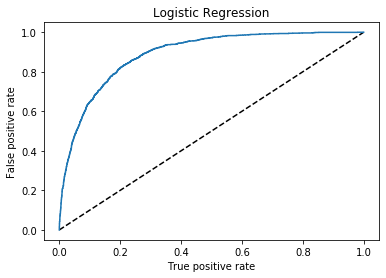

In [191]:
# FOR LOGISTIC REGRESSION

pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Logistic Regression')
plt.show()

In [192]:
auc_score=roc_auc_score(y_test,predlg)
auc_score

0.7426624579587086

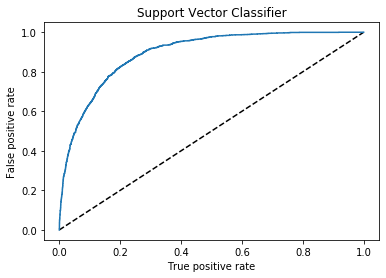

In [193]:
# FOR SVC

pred_prob=sv.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Support Vector Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Support Vector Classifier')
plt.show()

In [194]:
auc_score=roc_auc_score(y_test,predsv)
auc_score

0.737680997040564

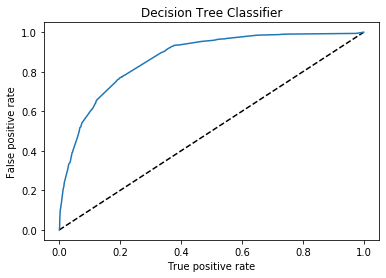

In [195]:
# FOR DECISION TREE CLASSIFIER

pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Decision Tree Classifier')
plt.show()

In [196]:
auc_score=roc_auc_score(y_test,preddt)
auc_score

0.7249707878951188

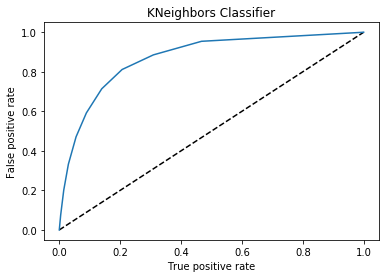

In [197]:
# FOR KNEIGHBORS CLASSIFIER

pred_prob=kn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighbors Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('KNeighbors Classifier')
plt.show()

In [198]:
auc_score=roc_auc_score(y_test,predkn)
auc_score

0.7514509816740346

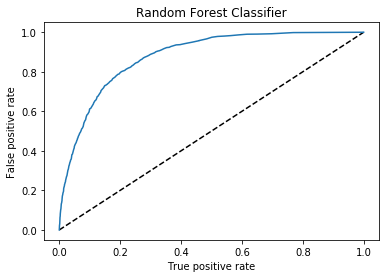

In [199]:
# FOR RANDOM FOREST CLASSIFIER

pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [201]:
auc_score=roc_auc_score(y_test,predrf)
auc_score

0.7412476318759736

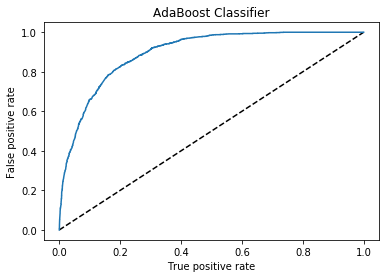

In [202]:
# ADABOOST CLASSIFIER

pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('AdaBoost Classifier')
plt.show()

In [203]:
auc_score=roc_auc_score(y_test,predad)
auc_score

0.7356258003288787

In [205]:
#joblib.dump(kn,'census_income_knn.obj')

['census_income_knn.obj']

In [58]:
from xgboost import XGBClassifier

In [59]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
predx=xgb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predx))
print('confusion_matrix',confusion_matrix(y_test,predx))
print('clasification_report',classification_report(y_test,predx))
score=cross_val_score(xgb,x,y,cv=5)
print(score.mean())

[20:21:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.8484087102177554
confusion_matrix [[5035  426]
 [ 660 1043]]
clasification_report               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      5461
         1.0       0.71      0.61      0.66      1703

    accuracy                           0.85      7164
   macro avg       0.80      0.77      0.78      7164
weighted avg       0.84      0.85      0.84      7164

[20:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metr

In [65]:
# xgbclassifier

par={'n_estimators':[100,150,200],'max_depth':range(2,10,2),'learning_rate':[.001,0.01,0.05,0.02],'gamma':[0.0,0.1,0.2,0.3],
    'eval_metric':['logloss']}
gcv=GridSearchCV(xgb,par,cv=3)
gcv.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [66]:
gcv.best_params_

{'eval_metric': 'logloss',
 'gamma': 0.3,
 'learning_rate': 0.05,
 'max_depth': 6,
 'n_estimators': 150}

In [67]:
xg=XGBClassifier(n_estimators=150,max_depth=6,learning_rate=0.05,eval_metric='logloss',gamma=0.3)
xg.fit(x_train,y_train)
predxg=xg.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predxg))
print('confusion_matrix',confusion_matrix(y_test,predxg))
print('clasification_report',classification_report(y_test,predxg))

accuracy_score 0.8488274706867671
confusion_matrix [[5090  371]
 [ 712  991]]
clasification_report               precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      5461
         1.0       0.73      0.58      0.65      1703

    accuracy                           0.85      7164
   macro avg       0.80      0.76      0.78      7164
weighted avg       0.84      0.85      0.84      7164



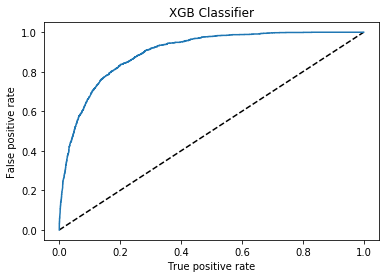

In [70]:
# XGBCLASSIFIER

pred_prob=xg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGB Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('XGB Classifier')
plt.show()

In [71]:
auc_score=roc_auc_score(y_test,predxg)
auc_score

0.7569889967648676

From above roc_auc_score, we can see that our best working model is XGB classifier.

### Saving our final model

In [73]:
import joblib

In [74]:
joblib.dump(xg,'census_income_xgb.obj')

['census_income_xgb.obj']